

# PandasAI

PandasAI is a Python library that adds Generative AI capabilities to pandas, the popular data analysis and manipulation tool. It is designed to be used in conjunction with pandas, and is not a replacement for it.

PandasAI makes pandas (and all the most used data analyst libraries) conversational, allowing you to ask questions to your data in natural language. For example, you can ask PandasAI to find all the rows in a DataFrame where the value of a column is greater than 5, and it will return a DataFrame containing only those rows.

You can also ask PandasAI to draw graphs, clean data, impute missing values, and generate features.

![](https://www.wsav.com/wp-content/uploads/sites/75/2023/03/GettyImages-175009379.jpg?w=2560&h=1440&crop=1)

# Installing PandasAI
We can directly install PandasAI with pip command.

In [1]:
!pip install --quiet pandasai

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
beatrix-jupyterlab 2023.128.151533 requires jupyterlab~=3.6.0, but you have jupyterlab 4.0.11 which is incompatible.
libpysal 4.9.2 requires packaging>=22, but you have packaging 21.3 which is incompatible.
libpysal 4.9.2 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
momepy 0.7.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
osmnx 1.8.1 requires shapely>=2.0, but you have shapely 1.8.5.post1 which is incompatible.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.
spopt 0.6.0 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
tensorflowjs 4.16.0 requires packaging~=23.1, but you have packaging 21.3 which is incompatible.
xarray 2024.1.0 requires packaging>=22, but you have packaging 

# Imports

I am using **PandasAI** with **GooglePalm** LLM model.

<div class="alert alert-block alert-info">
<b>Note that: </b> PandasAI gives the best results with OpenAI's GPT LLM models. I don't have access to OpenAI's API key because it is paid. It is also possible that some of the operations that do not work with Palm can work with OpenAI.  
</div>

In [1]:
from pandasai import SmartDataframe
from pandasai.llm import GooglePalm
from kaggle_secrets import UserSecretsClient
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Markdown
import textwrap

import warnings
warnings.filterwarnings("ignore")

def to_markdown(text):
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

ModuleNotFoundError: No module named 'kaggle_secrets'

In [3]:
rc = {
    "axes.facecolor": "#F8F8F8",
    "figure.facecolor": "#F8F8F8",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7" + "30",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4,
}

sns.set(rc=rc)
palette = ['#302c36', '#037d97', '#E4591E', '#C09741',
           '#EC5B6D', '#90A6B1', '#6ca957', '#D8E3E2']

from colorama import Style, Fore
blk = Style.BRIGHT + Fore.BLACK
mgt = Style.BRIGHT + Fore.MAGENTA
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
res = Style.RESET_ALL

plt.style.use('fivethirtyeight')

# Setup
1. First of all we have to setup the API key for using Google Palm model. You can get one from https://ai.google.dev/tutorials/setup
2. and then create a new secret called "YOUR_NAME" via Add-ons -> Secrets in the top menu, and attach it to this notebook.
3. After that define `llm` variable and pass the GooglePalm model.
4. Now we can define `SmartDataframe` in which we just pass the `.csv` file.

In [4]:
user_secrets = UserSecretsClient()
apiKey = user_secrets.get_secret("Gemini_API")

In [5]:
llm = GooglePalm(api_key=apiKey)
df = SmartDataframe("/kaggle/input/playground-series-s4e2/train.csv", config={"llm": llm})

# 1. Basic Data Exploration:
Now that we have defined the Dataframe we can directly ask the questions or give the instructions.

### head() function:

In [6]:
print(df.chat('Show me the first 5 rows of data in tabular form.'))

   id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad  
0  0.976473

As we can see it's giving us the first 5 rows if we put the response into `dislay` function then it'll show us it in tabular formate.

In [7]:
display(df.chat('Show me the first 5 rows of data in tabular form.'))

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


Printing last 5 rows.

In [8]:
display(df.chat('Show me the last 5 rows of data in tabular form.'))

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II
20757,20757,Male,26.680376,1.816547,118.134898,yes,yes,3.000000,3.000000,Sometimes,no,2.003563,no,0.684487,0.713823,Sometimes,Public_Transportation,Obesity_Type_II


Printing all the columns.

In [9]:
display(df.chat('List all the column names'))

,column_name
0,id
1,Gender
2,Age
3,Height
4,Weight
5,family_history_with_overweight
6,FAVC
7,FCVC
8,NCP
9,CAEC


Checking if there is any duplicate values. Same can be done with NULL values too!!

In [10]:
to_markdown(df.chat('Are there any duplicate values?'))

> No duplicate values found.

In [11]:
to_markdown(df.chat('Are there any NULL values?'))

> There are no NULL values in the data.

# 2. Basic Oprations on Data.
Now that we have explored the dataset let's do some baseic operations on the data.

Finding `mean` of the columns.

In [12]:
display(df.chat('What is the mean of Age'))

23.841804418681953

In [13]:
display(df.chat('What is the mean of Weight'))

87.88776840264958

In [14]:
display(df.chat('What is the mean of Height'))

1.7002449351575297

Finding `value_counts` for some categorical columns.

In [15]:
display(df.chat("What are the value counts for the column 'Gender'"))

,Gender
Female,10422
Male,10336


In [16]:
to_markdown(df.chat('Which is the most common gender?'))

> The most common gender is Female.

Now let's print all data in which age is equal to 18 basically using pandas `where` function.

In [17]:
display(df.chat("Show the data in the row where 'Age'='18'"))

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
1,1,Female,18.0,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.0,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
12,12,Male,18.0,1.811189,108.251044,yes,yes,2.000000,2.164839,Sometimes,no,2.530157,no,1.000000,0.553311,no,Public_Transportation,Obesity_Type_I
17,17,Female,18.0,1.560000,50.000000,no,yes,3.000000,3.000000,Sometimes,no,1.000000,no,1.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
24,24,Male,18.0,1.753321,52.058335,yes,yes,2.000000,3.000000,Sometimes,no,2.072194,no,0.680464,1.258881,no,Public_Transportation,Insufficient_Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20717,20717,Female,18.0,1.720000,50.000000,yes,no,3.000000,3.000000,Always,no,2.000000,yes,3.000000,2.000000,Sometimes,Public_Transportation,Insufficient_Weight
20720,20720,Male,18.0,1.717432,108.897324,yes,yes,2.000000,1.255350,Sometimes,no,2.000000,no,0.000000,1.967259,Sometimes,Public_Transportation,Obesity_Type_I
20722,20722,Female,18.0,1.650000,56.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,1.000000,1.000000,no,Public_Transportation,Normal_Weight
20746,20746,Female,18.0,1.610000,64.000000,yes,yes,3.000000,3.000000,Sometimes,no,2.000000,no,1.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight


As we can see all the rows have age=18. now, we can also try printing all the data in which weight is between 57 and 60.

In [18]:
display(df.chat("Show the rows where 'Weight' is between 57 and 60"))

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
1,1,Female,18.0,1.56,57.0,yes,yes,2.0,3.0,Frequently,no,2.0,no,1.0,1.0,no,Automobile,Normal_Weight
100,100,Female,38.0,1.50,60.0,no,yes,2.0,3.0,Sometimes,no,1.0,no,0.0,1.0,Sometimes,Automobile,Overweight_Level_I
112,112,Female,18.0,1.63,59.0,no,yes,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,no,Automobile,Normal_Weight
114,114,Male,18.0,1.76,57.0,yes,yes,3.0,3.0,Frequently,no,2.0,no,0.0,2.0,no,Public_Transportation,Insufficient_Weight
119,119,Male,23.0,1.82,58.0,no,yes,2.0,3.0,Sometimes,no,1.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20546,20546,Female,23.0,1.64,59.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,2.0,0.0,no,Public_Transportation,Normal_Weight
20565,20565,Female,20.0,1.56,58.0,no,yes,3.0,1.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Public_Transportation,Normal_Weight
20575,20575,Male,22.0,1.70,60.0,yes,yes,3.0,3.0,Frequently,no,2.0,no,3.0,0.0,no,Walking,Normal_Weight
20643,20643,Female,18.0,1.65,58.0,no,yes,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,no,Public_Transportation,Normal_Weight


As we can see all the results have weight between 57 and 60. Now, let's try to rename a column.

In [19]:
display(df.chat("Rename column 'SMOKE' as 'Smoke'"))

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,Smoke,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


Creating a new column `BMI` also the important feature for this competition.

$BMI=Weight / Height*2$

In [20]:
display(df.chat("Create a new column 'BMI=Weight / Height**2'"))

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,28.259565
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight,23.422091
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,17.126706
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,44.855798
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,25.599151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II,36.587084
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight,17.099278
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II,31.889841
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II,28.899693


Creating a coreraltion matrix.

In [21]:
display(df.chat('Print the correlation matrix for weight, age, height.'))

,Weight,Age,Height
id,0.014020,0.007634,0.012041
Age,0.283381,1.000000,-0.011713
Height,0.416677,-0.011713,1.000000
Weight,1.000000,0.283381,0.416677
FCVC,0.245682,0.034414,-0.071546
NCP,0.095947,-0.048479,0.191383
CH2O,0.317914,-0.016325,0.183706
FAF,-0.084845,-0.192259,0.295278
TUE,-0.086471,-0.296154,0.076433


# 3. Graph Plotting
PandasAI is also capable of plotting grahs too. You don't even have to import `matplotlib` or `seaborn` for that but I have imported them to use styling in graphs.

## Bar-Plot

'Unfortunately, I was not able to answer your question, because of the following error:\n\nexpected str, bytes or os.PathLike object, not Figure\n'

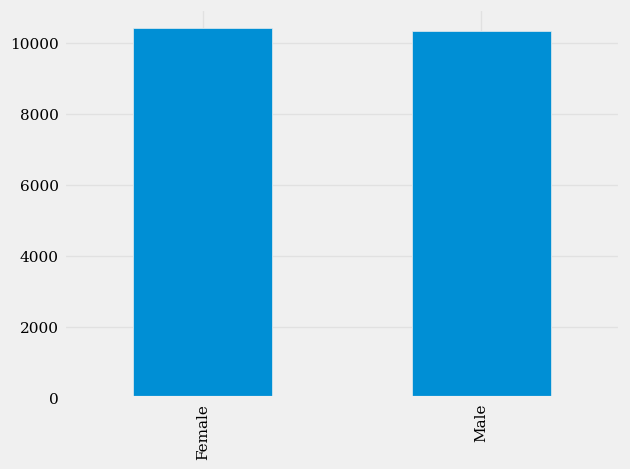

In [22]:
display(df.chat('Plot the bar plot of gender'))

Although it is saying that I am not able to give answer to your question it is also giving us the right plot for gender.

'Unfortunately, I was not able to answer your question, because of the following error:\n\nexpected str, bytes or os.PathLike object, not Figure\n'

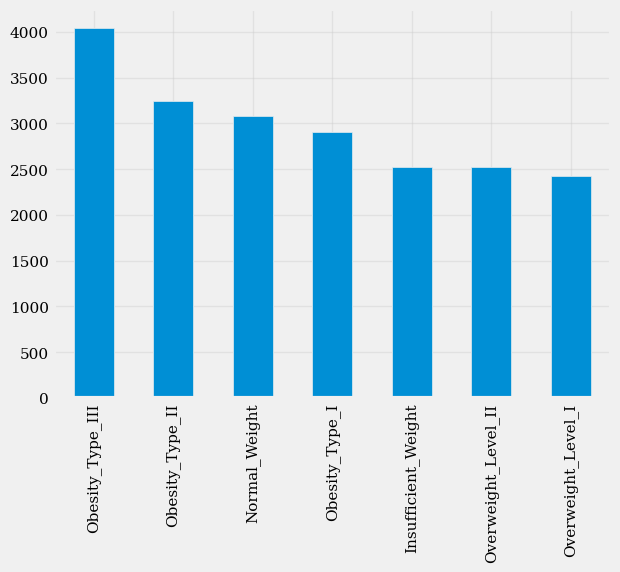

In [23]:
display(df.chat('Plot the bar plot of NObeyesdad'))

## Pie-Plot

'/kaggle/working/exports/charts/temp_chart.png'

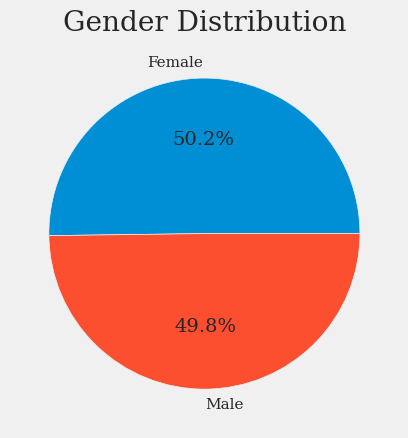

In [24]:
display(df.chat('Plot the pie plot of gender'))

## Histogram

Error: no "view" mailcap rules found for type "image/png"
/usr/bin/xdg-open: 869: www-browser: not found
/usr/bin/xdg-open: 869: links2: not found
/usr/bin/xdg-open: 869: elinks: not found
/usr/bin/xdg-open: 869: links: not found
/usr/bin/xdg-open: 869: lynx: not found
/usr/bin/xdg-open: 869: w3m: not found
xdg-open: no method available for opening '/tmp/tmplat3u3z3.PNG'


'Unfortunately, I was not able to answer your question, because of the following error:\n\nexpected str, bytes or os.PathLike object, not Figure\n'

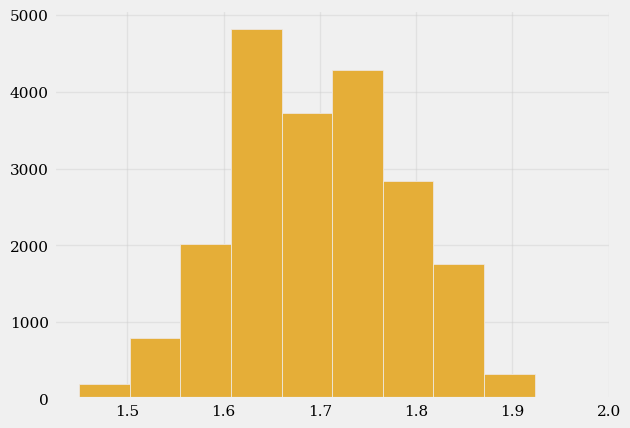

In [25]:
display(df.chat('plot the histogram of height'))

'Unfortunately, I was not able to answer your question, because of the following error:\n\nexpected str, bytes or os.PathLike object, not Figure\n'

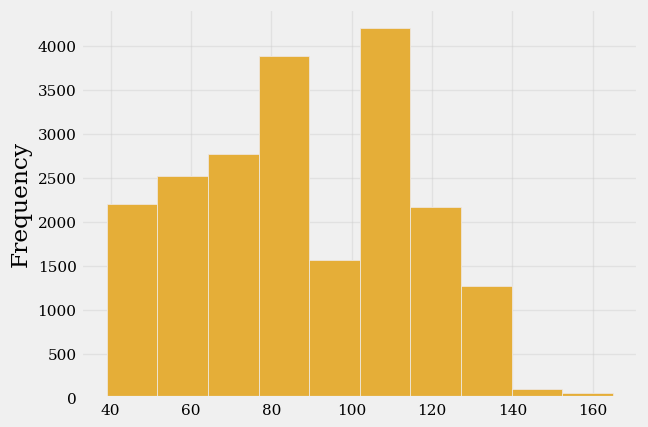

In [26]:
display(df.chat('plot the histogram of weight'))

## Box-Plot

'Unfortunately, I was not able to answer your question, because of the following error:\n\nThe number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of labels (1).\n'

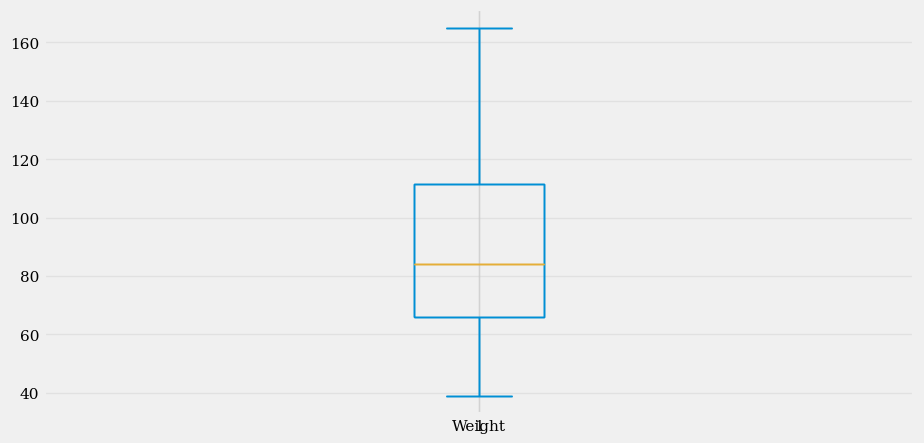

In [27]:
display(df.chat('plot the box-plot of weight'))

Finding outliers for weight.

In [28]:
display(df.chat('are there any ouliers for weight?'))

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
6,6,Male,29.883021,1.754711,112.725005,yes,yes,1.991240,3.000000,Sometimes,no,2.000000,no,0.000000,0.696948,Sometimes,Automobile,Obesity_Type_II
7,7,Male,29.891473,1.750150,118.206565,yes,yes,1.397468,3.000000,Sometimes,no,2.000000,no,0.598655,0.000000,Sometimes,Automobile,Obesity_Type_II
9,9,Female,26.000000,1.638836,111.275646,yes,yes,3.000000,3.000000,Sometimes,no,2.632253,no,0.000000,0.218645,Sometimes,Public_Transportation,Obesity_Type_III
12,12,Male,18.000000,1.811189,108.251044,yes,yes,2.000000,2.164839,Sometimes,no,2.530157,no,1.000000,0.553311,no,Public_Transportation,Obesity_Type_I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20749,20749,Female,25.783865,1.646390,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,1.530992,no,0.015860,0.445495,Sometimes,Public_Transportation,Obesity_Type_III
20751,20751,Female,21.030909,1.605495,133.466763,yes,yes,3.000000,3.000000,Sometimes,no,2.839069,no,1.683497,0.143675,Sometimes,Public_Transportation,Obesity_Type_III
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II


### Saving Dataframe into `.csv` file.
It is also capable of saving the dataframe into csv file.

In [29]:
to_markdown(df.chat("Save the dataframe to 'train.csv'"))

> The dataframe has been saved to train.csv.

# 4. Limitations
Here are some of the limitation I found during the coding. It is possible that it'll work with another LLM type.


## Scatter-Plot

'Unfortunately, I was not able to answer your question, because of the following error:\n\nexpected str, bytes or os.PathLike object, not Figure\n'

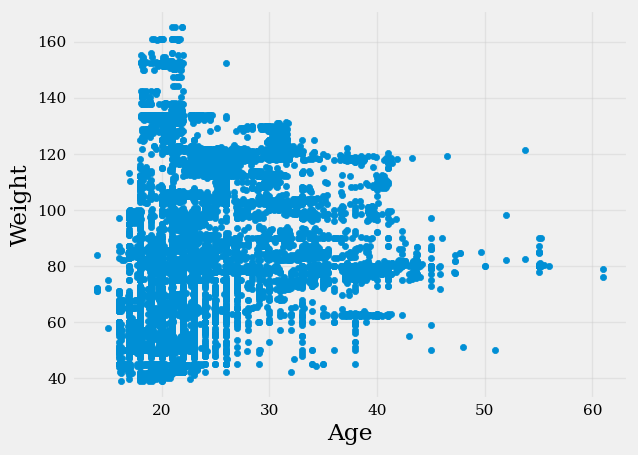

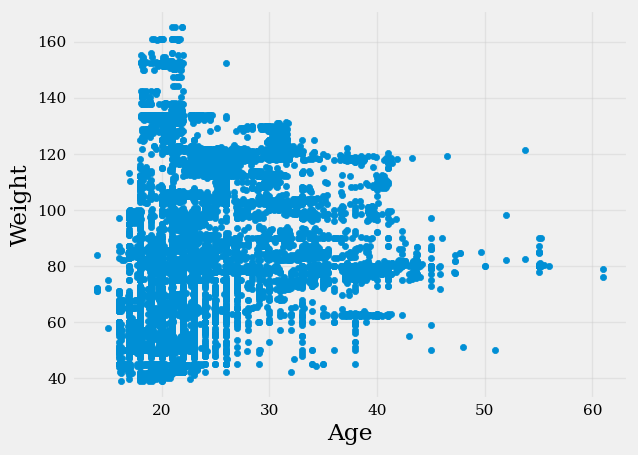

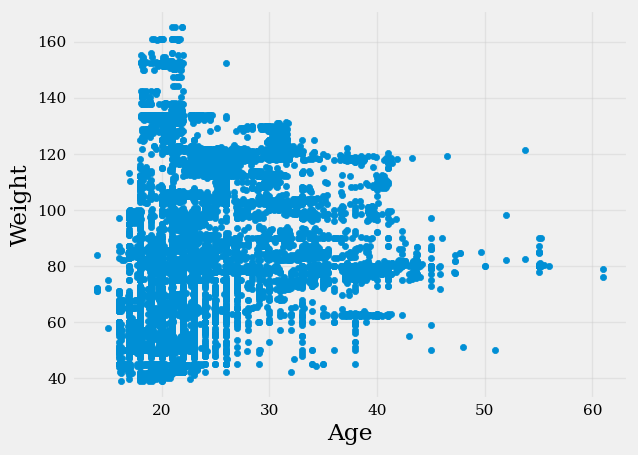

In [30]:
display(df.chat('plot the scatter plot of weight and age'))

Plots scatter plot 3 times.

In [31]:
print(df.chat("Show first 3 rows of columns 'Weight' and 'Gender'"))

   id  Gender
0   0    Male
1   1  Female
2   2  Female


Shows only `gender` rows.

In [32]:
display(df.chat('Can you give me the Description of the Data.'))

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


doesn't show the description which we get from `describe()` function.

In [33]:
display(df.chat('Can you give me the information of the Data.'))

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


doesn't show the infromation also which we get from `info()` function.

In [34]:
display(df.chat('Can you give me the shape of the Data.'))

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


Nope!!!

# 5. Conclusion

### Pros:

- Can easily perform simple tasks without having to remember any complex syntax
- Capable of giving conversational replies
- Easy report generation for quick analysis or data manipulation

### Cons:

- Cannot perform complex tasks
- Cannot create or interact with variables other than the passed dataframe

In conclusion, Pandas AI is not meant to replace Pandas. Though Pandas AI can easily perform simple tasks, it still faces difficulty performing some complex tasks like saving the dataframe, making a correlation matrix and many more.
